In [138]:
# Initialize Otter
import otter
grader = otter.Notebook("world_gdp_exploration.ipynb")

## Week 3 - World GDP Exploration

This notebook is created for the week 3 assignment. Here, you have a very messy and raw dataset of countries GDP.

Your task is to explore and visualize this dataset using the techniques you've learnt during the week. Analyzing the World GDP dataset through visualization can yield valuable insights, such as helping us understand global economic trends, identify countries with significant GDP growth or decline, and explore patterns over time.

For instance, we can create line plots to visualize the changes in GDP for different countries over the years. This allows us to observe the overall economic trajectory of nations, identify periods of rapid growth or recession, and compare the economic performance of different regions. 


In [139]:
import pandas as pd
import numpy as np
import os
%matplotlib inline
import otter
grader = otter.Notebook()
import seaborn as sns
import matplotlib.pyplot as plt

**Question 1:** Load the GDP dataset into a variable called `gdp_dataset`. Next, write a function called `check_data` to check if the data has been loaded successfully.

**Question 1.1:** Change the column `GDP, current prices (Billions of U.S. dollars)` to `Country`.

In [140]:

# gdp_dataset = pd.read_csv('C:\Users\mercy\IDS\week-3-data-visualization-and-insight-mersaii\world_gdp_dataset.csv')
gdp_dataset = pd.read_csv('C:/Users/mercy/IDS/week-3-data-visualization-and-insight-mersaii/world_gdp_dataset.csv')

def check_data(data):
    if data.empty:
        return 'Data loading unsuccessful'
    else:
        return 'Data loading successful'
    
check_data(gdp_dataset)

'Data loading successful'

In [141]:
gdp_dataset.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,...,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,57.338077,58.664699,57.584796,59.127786,61.232923,63.933893,75.388209,86.801087,97.609214,102.692837,...,405.250082,382.369679,388.832944,413.449760,439.845041,447.216026,435.921781,495.222102,518.159561,539.373740
std,240.113017,260.659304,265.846074,286.386716,313.352366,335.589357,375.354862,413.917627,459.752473,484.438418,...,1572.575493,1602.925694,1642.988598,1731.343695,1855.248794,1920.720806,1907.553151,2153.339784,2284.284731,2392.051388
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.024000,0.075250,0.082500,0.086250,0.103500,...,8.453250,7.824250,6.948750,7.661000,8.173750,8.729250,8.492500,8.694000,9.623000,9.004750
50%,2.631000,2.754500,2.754500,2.910000,2.911000,3.108500,3.074500,2.991500,3.234000,3.412500,...,34.649500,32.727000,33.020000,35.780000,37.373500,37.983000,34.068000,38.018000,39.821000,40.484500
75%,25.375500,25.908750,24.914500,24.994750,23.249500,21.782500,27.673750,32.787750,32.983250,38.040000,...,216.505750,189.031000,193.687000,212.692250,230.460250,235.255000,214.971500,247.744250,262.243250,255.611000
max,2857.325000,3207.025000,3343.800000,3634.025000,4037.650000,4339.000000,4579.625000,4855.250000,5236.425000,5641.600000,...,17550.675000,18206.025000,18695.100000,19479.625000,20527.150000,21372.600000,20893.750000,22996.075000,25035.164000,26185.210000


In [142]:
gdp_dataset.head()

,"GDP, current prices (Billions of U.S. dollars)",1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,20.616,20.057,18.020,18.883,18.401,18.876,20.136,0.000,0.000,0.000
1,Albania,1.946,2.229,2.296,2.319,2.290,2.339,2.587,2.566,2.530,...,13.246,11.389,11.862,13.053,15.157,15.399,15.161,18.310,18.256,18.842
2,Algeria,42.346,44.372,44.780,47.529,51.513,61.132,61.535,63.300,51.664,...,213.810,165.979,160.034,170.207,175.372,171.680,144.922,162.711,187.155,190.254
3,Andorra,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,3.267,2.789,2.895,2.993,3.217,3.155,2.885,3.330,3.302,3.360
4,Angola,6.639,6.214,6.214,6.476,6.864,8.457,7.918,9.050,9.818,...,145.712,116.194,101.124,122.022,101.353,84.516,58.125,75.179,124.794,135.558


In [143]:
gdp_dataset.shape

(230, 45)

In [144]:
gdp_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 45 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   GDP, current prices (Billions of U.S. dollars)  197 non-null    object 
 1   1980                                            196 non-null    float64
 2   1981                                            196 non-null    float64
 3   1982                                            196 non-null    float64
 4   1983                                            196 non-null    float64
 5   1984                                            196 non-null    float64
 6   1985                                            196 non-null    float64
 7   1986                                            196 non-null    float64
 8   1987                                            196 non-null    float64
 9   1988                                       

In [145]:
gdp_dataset.isnull().sum()

GDP, current prices (Billions of U.S. dollars)    33
1980                                              34
1981                                              34
1982                                              34
1983                                              34
1984                                              34
1985                                              34
1986                                              34
1987                                              34
1988                                              34
1989                                              34
1990                                              34
1991                                              34
1992                                              34
1993                                              34
1994                                              34
1995                                              34
1996                                              34
1997                                          

In [146]:
gdp_dataset.dropna(inplace=True)
gdp_dataset.shape
gdp_dataset.isnull().sum()

GDP, current prices (Billions of U.S. dollars)    0
1980                                              0
1981                                              0
1982                                              0
1983                                              0
1984                                              0
1985                                              0
1986                                              0
1987                                              0
1988                                              0
1989                                              0
1990                                              0
1991                                              0
1992                                              0
1993                                              0
1994                                              0
1995                                              0
1996                                              0
1997                                              0
1998        

**Question 2:** Obtain the range/distribution of GDP with HIGHEST frequency between 2010 and 2022. You can use any chart/plot of your choice.

**Note**: assign your chart/plot to a variable called `highest_gdp`. Failure to do this might result in you not getting a score for this question.


In [147]:
# subset_df = gdp_dataset.loc[:, '2010':'2022']
# highest_frequency_year = subset_df.apply(lambda x: x.value_counts().idxmax()).idxmax()

# plt.figure(figsize=(12, 6))
# highest_gdp = sns.histplot(subset_df[highest_frequency_year].dropna(), bins=20, kde=True)
# plt.title(f'Distribution of GDP in {highest_frequency_year}')
# plt.xlabel('GDP (Billions of U.S. dollars)')
# plt.ylabel('Frequency')
# plt.show()

In [148]:
# slice data set to get the years 2010 to 2022 but include the first column too
# subset_df = gdp_dataset.loc[:, 1, '2010':'2022']
# subset_df

subset_df1 = gdp_dataset.loc[:, '2010':'2022']
subset_df2 = gdp_dataset['GDP, current prices (Billions of U.S. dollars)']

# Apply binning function 
# binned_data = subset_df.apply(lambda x: pd.cut(x, bins=2, duplicates='drop'), axis=1)
binned_data = subset_df1.apply(lambda x: pd.cut(x, bins=5, duplicates='drop'), axis=1) 
# binned_data

# merge the two dataframes
subset_df = pd.concat([subset_df2, binned_data ], axis=1)
subset_df

,"GDP, current prices (Billions of U.S. dollars)",2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,"(12.37, 16.493]","(16.493, 20.616]","(16.493, 20.616]","(16.493, 20.616]","(16.493, 20.616]","(16.493, 20.616]","(16.493, 20.616]","(16.493, 20.616]","(16.493, 20.616]","(16.493, 20.616]","(16.493, 20.616]","(-0.0206, 4.123]","(-0.0206, 4.123]"
1,Albania,"(11.382, 12.773]","(12.773, 14.157]","(11.382, 12.773]","(12.773, 14.157]","(12.773, 14.157]","(11.382, 12.773]","(11.382, 12.773]","(12.773, 14.157]","(14.157, 15.542]","(14.157, 15.542]","(14.157, 15.542]","(16.926, 18.31]","(16.926, 18.31]"
2,Algeria,"(158.7, 172.477]","(186.255, 200.032]","(200.032, 213.81]","(200.032, 213.81]","(200.032, 213.81]","(158.7, 172.477]","(158.7, 172.477]","(158.7, 172.477]","(172.477, 186.255]","(158.7, 172.477]","(144.853, 158.7]","(158.7, 172.477]","(186.255, 200.032]"
3,Andorra,"(3.291, 3.458]","(3.458, 3.625]","(3.123, 3.291]","(3.123, 3.291]","(3.123, 3.291]","(2.788, 2.956]","(2.788, 2.956]","(2.956, 3.123]","(3.123, 3.291]","(3.123, 3.291]","(2.788, 2.956]","(3.291, 3.458]","(3.291, 3.458]"
4,Angola,"(75.642, 93.16]","(110.677, 128.195]","(110.677, 128.195]","(128.195, 145.712]","(128.195, 145.712]","(110.677, 128.195]","(93.16, 110.677]","(110.677, 128.195]","(93.16, 110.677]","(75.642, 93.16]","(58.037, 75.642]","(58.037, 75.642]","(110.677, 128.195]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Vietnam,"(142.941, 197.331]","(142.941, 197.331]","(142.941, 197.331]","(197.331, 251.45]","(197.331, 251.45]","(197.331, 251.45]","(251.45, 305.57]","(251.45, 305.57]","(251.45, 305.57]","(305.57, 359.689]","(305.57, 359.689]","(359.689, 413.808]","(359.689, 413.808]"
192,West Bank and Gaza,"(9.673, 11.509]","(9.673, 11.509]","(11.509, 13.336]","(13.336, 15.164]","(13.336, 15.164]","(13.336, 15.164]","(15.164, 16.991]","(15.164, 16.991]","(15.164, 16.991]","(16.991, 18.818]","(15.164, 16.991]","(16.991, 18.818]","(16.991, 18.818]"
193,Yemen,"(28.602, 33.477]","(28.602, 33.477]","(33.477, 38.353]","(38.353, 43.229]","(38.353, 43.229]","(38.353, 43.229]","(28.602, 33.477]","(23.726, 28.602]","(18.826, 23.726]","(18.826, 23.726]","(18.826, 23.726]","(18.826, 23.726]","(23.726, 28.602]"
194,Zambia,"(20.097, 22.083]","(22.083, 24.07]","(24.07, 26.056]","(26.056, 28.042]","(26.056, 28.042]","(20.097, 22.083]","(20.097, 22.083]","(24.07, 26.056]","(26.056, 28.042]","(22.083, 24.07]","(18.101, 20.097]","(20.097, 22.083]","(26.056, 28.042]"


In [ ]:
# Create a dictionary to store counts
value_counts_dict = {}

# Loop through each column
for col in subset_df.columns[1:]:  # Exclude the 'Country' column
    # Loop through each unique value in the column
    for value in subset_df[col].unique():
        # If the value is not already in the dictionary, add it with a count of 1
        # If it's already in the dictionary, increment the count
        value_counts_dict[value] = value_counts_dict.get(value, 0) + 1

# Display the dictionary
print(value_counts_dict)

In [137]:
# Identify the most frequent bin 
binned_data['most_frequent_bins 2010-2012'] = binned_data.mode(axis=1).iloc[:, 0]

# bin_counts = binned_data['most_frequent_bins 2010-2012'].value_counts()
binned_data

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,most_frequent_bins 2010-2012
0,"(12.37, 16.493]","(16.493, 20.616]","(16.493, 20.616]","(16.493, 20.616]","(16.493, 20.616]","(16.493, 20.616]","(16.493, 20.616]","(16.493, 20.616]","(16.493, 20.616]","(16.493, 20.616]","(16.493, 20.616]","(-0.0206, 4.123]","(-0.0206, 4.123]","(16.493, 20.616]"
1,"(11.382, 12.773]","(12.773, 14.157]","(11.382, 12.773]","(12.773, 14.157]","(12.773, 14.157]","(11.382, 12.773]","(11.382, 12.773]","(12.773, 14.157]","(14.157, 15.542]","(14.157, 15.542]","(14.157, 15.542]","(16.926, 18.31]","(16.926, 18.31]","(11.382, 12.773]"
2,"(158.7, 172.477]","(186.255, 200.032]","(200.032, 213.81]","(200.032, 213.81]","(200.032, 213.81]","(158.7, 172.477]","(158.7, 172.477]","(158.7, 172.477]","(172.477, 186.255]","(158.7, 172.477]","(144.853, 158.7]","(158.7, 172.477]","(186.255, 200.032]","(158.7, 172.477]"
3,"(3.291, 3.458]","(3.458, 3.625]","(3.123, 3.291]","(3.123, 3.291]","(3.123, 3.291]","(2.788, 2.956]","(2.788, 2.956]","(2.956, 3.123]","(3.123, 3.291]","(3.123, 3.291]","(2.788, 2.956]","(3.291, 3.458]","(3.291, 3.458]","(3.123, 3.291]"
4,"(75.642, 93.16]","(110.677, 128.195]","(110.677, 128.195]","(128.195, 145.712]","(128.195, 145.712]","(110.677, 128.195]","(93.16, 110.677]","(110.677, 128.195]","(93.16, 110.677]","(75.642, 93.16]","(58.037, 75.642]","(58.037, 75.642]","(110.677, 128.195]","(110.677, 128.195]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,"(142.941, 197.331]","(142.941, 197.331]","(142.941, 197.331]","(197.331, 251.45]","(197.331, 251.45]","(197.331, 251.45]","(251.45, 305.57]","(251.45, 305.57]","(251.45, 305.57]","(305.57, 359.689]","(305.57, 359.689]","(359.689, 413.808]","(359.689, 413.808]","(142.941, 197.331]"
192,"(9.673, 11.509]","(9.673, 11.509]","(11.509, 13.336]","(13.336, 15.164]","(13.336, 15.164]","(13.336, 15.164]","(15.164, 16.991]","(15.164, 16.991]","(15.164, 16.991]","(16.991, 18.818]","(15.164, 16.991]","(16.991, 18.818]","(16.991, 18.818]","(15.164, 16.991]"
193,"(28.602, 33.477]","(28.602, 33.477]","(33.477, 38.353]","(38.353, 43.229]","(38.353, 43.229]","(38.353, 43.229]","(28.602, 33.477]","(23.726, 28.602]","(18.826, 23.726]","(18.826, 23.726]","(18.826, 23.726]","(18.826, 23.726]","(23.726, 28.602]","(18.826, 23.726]"
194,"(20.097, 22.083]","(22.083, 24.07]","(24.07, 26.056]","(26.056, 28.042]","(26.056, 28.042]","(20.097, 22.083]","(20.097, 22.083]","(24.07, 26.056]","(26.056, 28.042]","(22.083, 24.07]","(18.101, 20.097]","(20.097, 22.083]","(26.056, 28.042]","(20.097, 22.083]"


In [ ]:
# Plot the bar chart
highest_gdp = binned_data.plot(kind='bar', figsize=(10, 6))
plt.title('Frequency Distribution of Most Frequent Bins (2010-2022)')
plt.xlabel('Bins')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [15]:
# Create a DataFrame with 'Year' and 'Most_Frequent_Bin' columns
# most_frequent_bins = most_frequent_bins.astype('category')

**Question 3:** Which countries has GDP higher than 1 trillion dollar in 2022?

**Note**: assign your chart/plot to a variable called `one_trillion_gdp`. Failure to do this might result in you not getting a score for this question.

In [16]:
gdp_2022 = gdp_dataset[['GDP, current prices (Billions of U.S. dollars)', '2022']].dropna()
gdp_2022

,"GDP, current prices (Billions of U.S. dollars)",2022
0,Afghanistan,0.000
1,Albania,18.256
2,Algeria,187.155
3,Andorra,3.302
4,Angola,124.794
...,...,...
191,Vietnam,413.808
192,West Bank and Gaza,18.818
193,Yemen,27.594
194,Zambia,27.025


C:\Users\mercy\AppData\Local\Temp\ipykernel_9688\347309489.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  one_trillion_gdp.set_xticklabels(one_trillion_gdp.get_xticklabels(), rotation=45, ha='right', fontsize=10)


[Text(0, 0, 'Australia'),
 Text(1, 0, 'Brazil'),
 Text(2, 0, 'Canada'),
 Text(3, 0, "China, People's Republic of"),
 Text(4, 0, 'France'),
 Text(5, 0, 'Germany'),
 Text(6, 0, 'India'),
 Text(7, 0, 'Indonesia'),
 Text(8, 0, 'Iran'),
 Text(9, 0, 'Italy'),
 Text(10, 0, 'Japan'),
 Text(11, 0, 'Korea, Republic of'),
 Text(12, 0, 'Mexico'),
 Text(13, 0, 'Russian Federation'),
 Text(14, 0, 'Saudi Arabia'),
 Text(15, 0, 'Spain'),
 Text(16, 0, 'United Kingdom'),
 Text(17, 0, 'United States')]

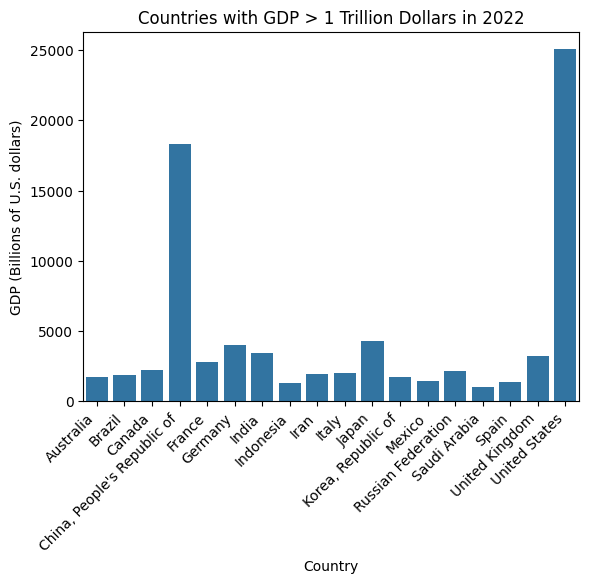

In [17]:
gdp_1_trillion = gdp_2022[gdp_2022['2022'] > 1000]
# print("Countries with GDP higher than 1 trillion dollars in 2022:")
# print(gdp_1_trillion)

one_trillion_gdp = sns.barplot(x='GDP, current prices (Billions of U.S. dollars)', y='2022', data=gdp_1_trillion)
one_trillion_gdp.set(xlabel='Country', ylabel='GDP (Billions of U.S. dollars)')
one_trillion_gdp.set_title('Countries with GDP > 1 Trillion Dollars in 2022')
one_trillion_gdp.set_xticklabels(one_trillion_gdp.get_xticklabels(), rotation=45, ha='right', fontsize=10) 

**Question 4:** Has the USA and China ever be in recession? Use a chart/plot to show this.

**Note**: Assign your chart/plot to a variable called `recession`. Failure to do this might result in you not getting a score for this question.

<Axes: title={'center': 'USA and China Recession Years'}, xlabel='Recession', ylabel='Count'>

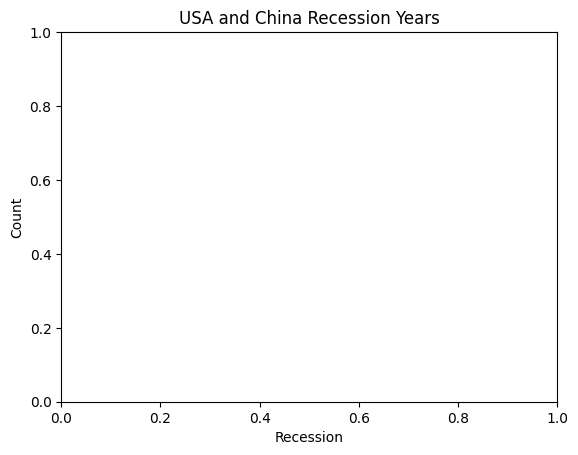

In [18]:
# show whether USA and China has ever been in recession

def check_recession(dataframe):
    # Filter the data for the USA and China
    usa_china_recession = dataframe.loc[dataframe['GDP, current prices (Billions of U.S. dollars)'].isin(['USA', 'China']), ['GDP, current prices (Billions of U.S. dollars)', '1980', '1981', '1982', '1990', '2001', '2008']]
    
    # Identify recession years for the USA and China
    usa_china_recession['Recession'] = usa_china_recession.apply(lambda row: 'Yes' if any(row < 0) else 'No', axis=1)
    
    # visualize recession years
    recession = sns.countplot(x='Recession', data=usa_china_recession, hue='GDP, current prices (Billions of U.S. dollars)')
    recession.set_title('USA and China Recession Years')
    recession.set_xlabel('Recession')
    recession.set_ylabel('Count')
    
    return recession

recession = check_recession(gdp_dataset)
recession

<!-- BEGIN QUESTION -->

**Question 5:** What insight can you derive from this data?

'China, Peoples Republic of' and the united states seem to have the economy with the highest and climbing GDP and have never experienced a recession. With United states topping china.

<!-- END QUESTION -->



## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

These are some submission instructions.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)